# Get Prediction Results

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def rmse(x):
    x = x**2
    x = x.mean()
    x = x**(1/2)
    return x

def mae(x):
    x = abs(x)
    return x.mean()

agg_dict = {
    "Tg_diff": [mae, rmse],
    "Tm_diff": [mae, rmse]
}

In [12]:
df_gbpm = pd.read_csv("GB_results/GB_pm_results.csv")
df_gbnopm = pd.read_csv("GB_results/GB_nopm_results.csv")
df_mpnn = pd.read_csv("GB_results/MPNN_results.csv")

full_raw_df = pd.concat([df_gbpm, df_gbnopm, df_mpnn])

In [58]:
full_raw_df["Tm_diff"] = full_raw_df.Tm - full_raw_df.Tm_pred
full_raw_df["Tg_diff"] = full_raw_df.Tg - full_raw_df.Tg_pred
full_err_df = full_raw_df.groupby(["model", "model_id"]).agg(agg_dict).reset_index()
full_err_df.columns = list(map('_'.join, full_err_df.columns.values))
full_err_df = full_err_df.rename(columns={"model_": "model", "model_id_": "model_id", "Tg_diff_mae": "Tg_MAE", "Tg_diff_rmse": "Tg_RMSE", "Tm_diff_mae": "Tm_MAE", "Tm_diff_rmse": "Tm_RMSE"})

In [14]:
err_df = full_err_df[full_err_df.model.isin(["GB_nopm", "GB_pm", "MPNN_global_pm", "MPNN_no_chiral"])]

In [57]:
kfold_err_melt_df.model

,model,model_id,variable,value,ordering
109,MPNN$_{chiral}$,9,Tm_RMSE,22.078045,0
22,MPNN$_{chiral}$,2,Tm_MAE,14.911811,0
23,MPNN$_{chiral}$,3,Tm_MAE,19.863166,0
25,MPNN$_{chiral}$,5,Tm_MAE,7.243072,0
26,MPNN$_{chiral}$,6,Tm_MAE,12.573902,0
...,...,...,...,...,...
48,GB$_{nochiral}$,8,Tg_MAE,9.600679,8
47,GB$_{nochiral}$,7,Tg_MAE,13.250566,8
46,GB$_{nochiral}$,6,Tg_MAE,12.209608,8
122,GB$_{nochiral}$,2,Tg_RMSE,22.684057,8


In [50]:
kfold_err_df = err_df
kfold_err_melt_df = kfold_err_df.melt(id_vars=["model", "model_id"], value_vars=["Tm_MAE", "Tg_MAE", "Tm_RMSE", "Tg_RMSE"])



replace_dict = {
    "MPNN_global_pm": "MPNN$_{pm}$",
    "MPNN_global_pm_no_ctag": "MPNN$_{pm}$",
    "MPNN_ctag": "MPPN$_{ctag}$",
    "MPNN_no_chiral": "MPNN$_{nochiral}$",
    "RF_no_pm": "RF$_{achiral}$",
    "RF_pm": "RF$_{chiral}$",
    "GB_nopm": "GB$_{nochiral}$",
    "GB_pm": "GB$_{chiral}$",
}

order_map_dict = {
    "MPNN_global_pm": 0,
    "RF_pm": 3,
    "GB_pm": 4,
    "MPNN_no_chiral": 7,
    "GB_nopm": 8,
}

order_map_dict = {replace_dict[key]: val for key, val in order_map_dict.items()}
replace_var_dict = {"Tm_MAE": "T$_{m}$ MAE", "Tg_MAE": "T$_{g}$ MAE", "Tg_RMSE": "T$_{g}$ RMSE", "Tm_RMSE": "T$_{m}$ RMSE"}

# order_map_dict = {key: val*-1 for key, val in order_map_dict.items()}

kfold_err_melt_df["model"] = kfold_err_melt_df.model.apply(lambda s: replace_dict[s])
kfold_err_melt_df["ordering"] = kfold_err_melt_df.model.apply(lambda s: order_map_dict[s])
kfold_err_melt_df = kfold_err_melt_df.sort_values(by="ordering")

/var/folders/mn/k32kn37x5ldgpp51c6cdmkpm0000gn/T/ipykernel_12561/3528776056.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("../MPNN_GB_Results.png", pdi=300)


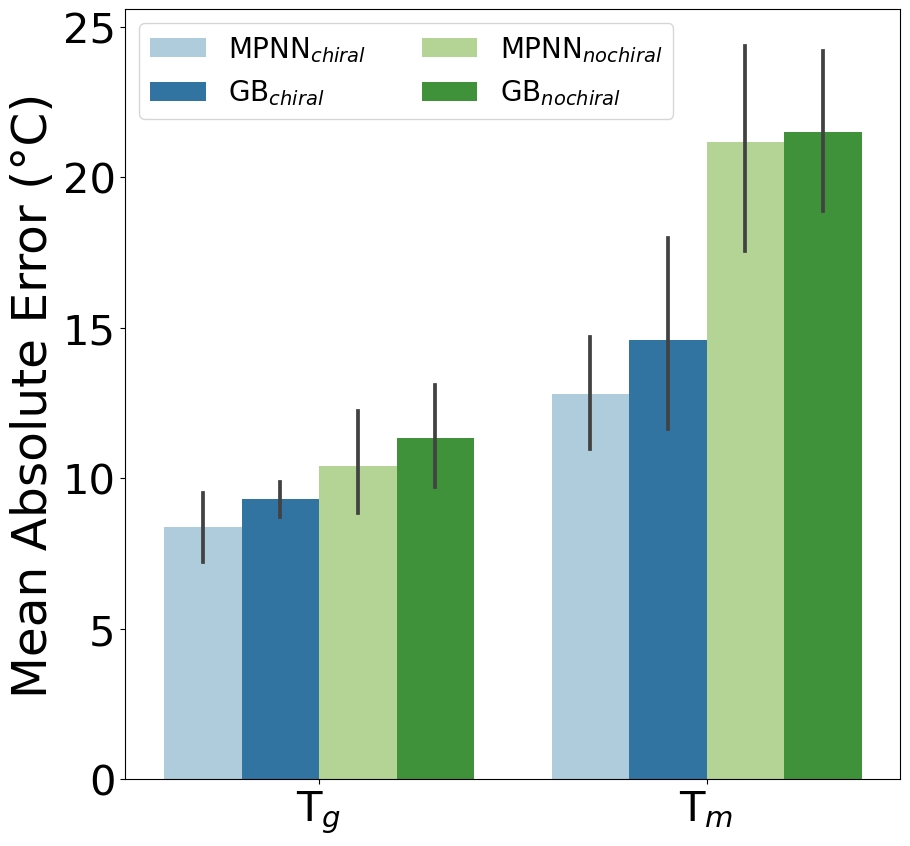

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Actual Plot Stuff
# sns.barplot(y="value", x="model", hue="variable", data=kfold_err_melt_df)#, order=["Tg_MAE", "Tm_MAE", "Tg_RMSE", "Tm_RMSE"], ax=ax)
sns.barplot(y="value", x="variable", hue="model", data=kfold_err_melt_df, order=["Tg_MAE", "Tm_MAE"], ax=ax, palette=sns.color_palette("Paired"))
# Legend Stuff
# ax.legend(loc="left") #right", ncol=1, bbox_to_anchor=(.6, .5, 1, 0))
ax.legend(title="Model")

ax.set_ylabel("Mean Absolute Error (°C)")

# ax.set_yscale("log")
ax.legend(ncol=2, fontsize=20)
label_size = 35
tick_size = 30
ax.set_ylabel("Mean Absolute Error (°C)", fontsize=label_size)
ax.set_xlabel("")
ax.set_xticklabels(["T$_g$", "T$_m$"])
# ax.set_xlabel(fontsize=label_size)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)
# ax.set_aspect('equal', adjustable='datalim')
ax.set_xticklabels(["T$_{g}$", "T$_{m}$",])# "T$_{g}$ RMSE", "T$_{m}$ RMSE",])
plt.savefig("../MPNN_GB_Results.png", pdi=300)